In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


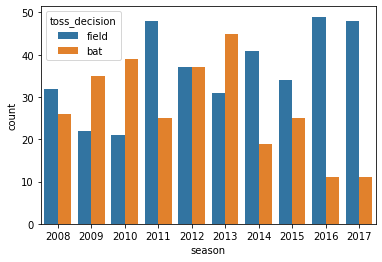

In [3]:
sns.countplot(x='season',hue='toss_decision',data=df)

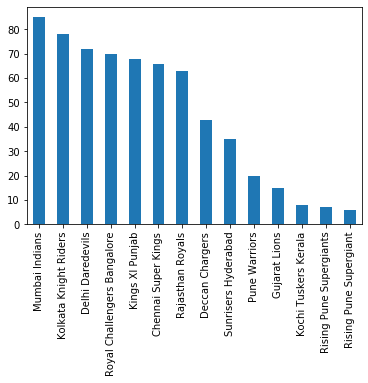

In [4]:
df['toss_winner'].value_counts().plot(kind='bar')

In [5]:
teams = (df['team1'].value_counts()+df['team2'].value_counts()).reset_index()
teams.columns = ['team_name','matches']
teams

,team_name,matches
0,Chennai Super Kings,131
1,Deccan Chargers,75
2,Delhi Daredevils,147
3,Gujarat Lions,30
4,Kings XI Punjab,148
5,Kochi Tuskers Kerala,14
6,Kolkata Knight Riders,148
7,Mumbai Indians,157
8,Pune Warriors,46
9,Rajasthan Royals,118


In [6]:
wins = df['winner'].value_counts().reset_index()

In [7]:
wins.columns = ['team_name','wins']

In [8]:
player = teams.merge(wins,left_on='team_name',right_on='team_name', how='inner')
player

,team_name,matches,wins
0,Chennai Super Kings,131,79
1,Deccan Chargers,75,29
2,Delhi Daredevils,147,62
3,Gujarat Lions,30,13
4,Kings XI Punjab,148,70
5,Kochi Tuskers Kerala,14,6
6,Kolkata Knight Riders,148,77
7,Mumbai Indians,157,92
8,Pune Warriors,46,12
9,Rajasthan Royals,118,63


In [9]:
player['%win'] = (player['wins']/player['matches'])*100
player

,team_name,matches,wins,%win
0,Chennai Super Kings,131,79,60.305344
1,Deccan Chargers,75,29,38.666667
2,Delhi Daredevils,147,62,42.176871
3,Gujarat Lions,30,13,43.333333
4,Kings XI Punjab,148,70,47.297297
5,Kochi Tuskers Kerala,14,6,42.857143
6,Kolkata Knight Riders,148,77,52.027027
7,Mumbai Indians,157,92,58.598726
8,Pune Warriors,46,12,26.086957
9,Rajasthan Royals,118,63,53.389831


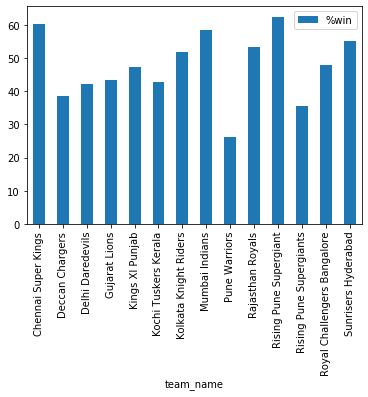

In [15]:
player.plot(kind='bar',y='%win',x='team_name')

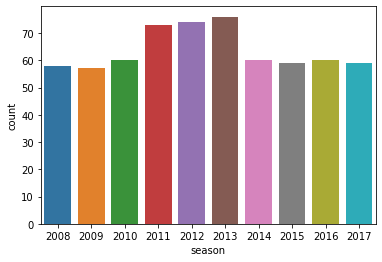

In [17]:
sns.countplot(df['season'])